# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Cars_Country.csv')
data

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [3]:
X = data.iloc[:,:-1].values     #把品牌的Label去除掉
X     #然後會發現我資料中的dtype每個數值並不是數字而是object

array([[14.0, 8, '350', ..., '4209', 12, 1972],
       [31.9, 4, '89', ..., '1925', 14, 1980],
       [17.0, 8, '302', ..., '3449', 11, 1971],
       ...,
       [22.0, 6, '232', ..., '2835', 15, 1983],
       [18.0, 6, '232', ..., '3288', 16, 1972],
       [22.0, 6, '250', ..., '3353', 15, 1977]], dtype=object)

In [4]:
X = pd.DataFrame(X)     #把X從numpy矩陣轉回dataframe
X = X._convert(numeric=True)     #並且把dataframe中的資料型態全部改成數值
X

,0,1,2,3,4,5,6
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


In [5]:
X.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']     #把行的名稱放回去
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


## Eliminating null values

In [6]:
for i in X.columns:     #看一下每一行有多少個缺失值
    print(i,X[i].isnull().sum())

mpg 0
cylinders 0
cubicinches 2
hp 0
weightlbs 3
time-to-60 0
year 0


In [7]:
for i in X.columns:     #把每一行有缺的地方用平均填充
    X[i] = X[i].fillna(int(X[i].mean()))

In [8]:
for i in X.columns:     #再來看一下還有沒有缺失值
    print(i,X[i].isnull().sum())

mpg 0
cylinders 0
cubicinches 0
hp 0
weightlbs 0
time-to-60 0
year 0


In [9]:
##因為資料都是數值，所以就不用做Label Encoding了

## Using the elbow method to find  the optimal number of clusters

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):     #我們從1群分到10群，來看看分幾群的效果最好
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)     
    #init選用'k-means++'，讓出使隨機選擇的向量相互較遠，比較能不受影響
    #max_iter=300，最多就迭代300次
    #n_init=10，讓算法跑10次，會自動回傳表現最好的那次結果
    #random_state=0，隨機樹生成器的種子=0(也可以隨機給個數字)
        
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     #回傳每個點到那一群中心的距離的加總
wcss

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\SamuelZovith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to 

[190979989.47885057,
 49086969.570499375,
 23286066.70413702,
 12405064.793384362,
 8922728.512164075,
 6559162.073382956,
 4848912.979245454,
 3633292.1662425534,
 3042403.15687621,
 2566548.207910249]

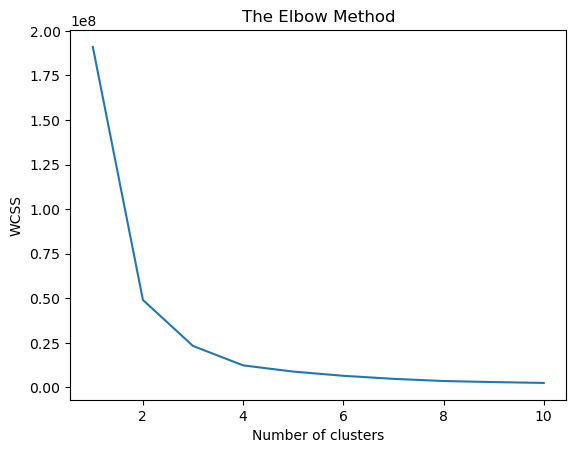

In [11]:
plt.plot(range(1,11),wcss)     #觀察分成幾群後距離變化最明顯
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#可以看出大概分成3群之後，距離下降開始減少，所以待會選用3群來做

In [12]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)     #使用kmeans方法分出3群，一樣跑10次
y_kmeans = kmeans.fit_predict(X)     #預測出每一筆資料所屬的群
y_kmeans

C:\Users\SamuelZovith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1])

## Visualising the clusters

In [13]:
X_numpy = X.to_numpy()
X_numpy

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

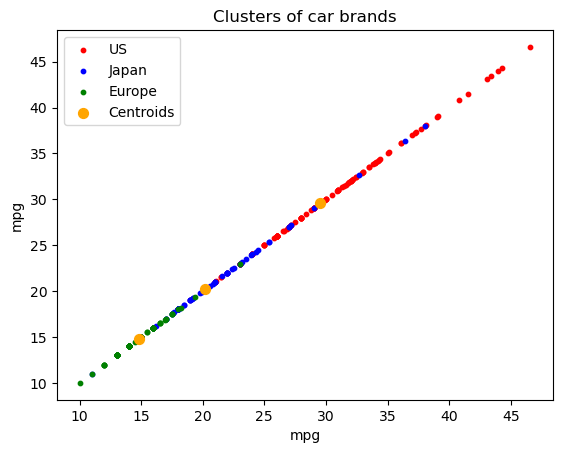

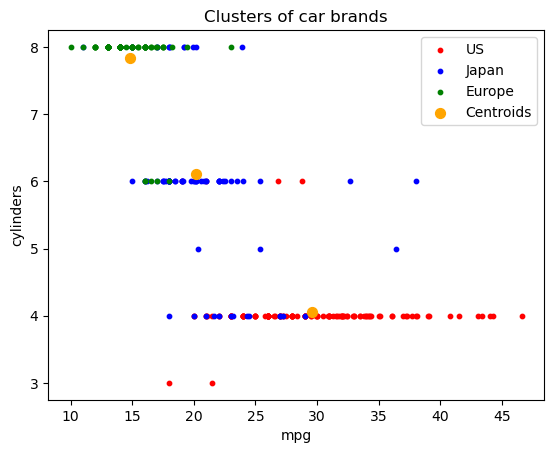

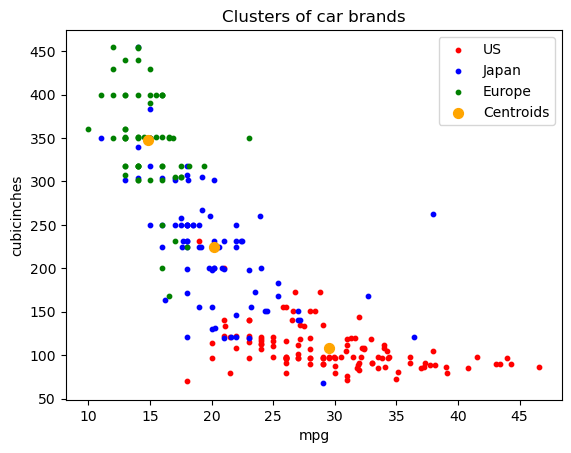

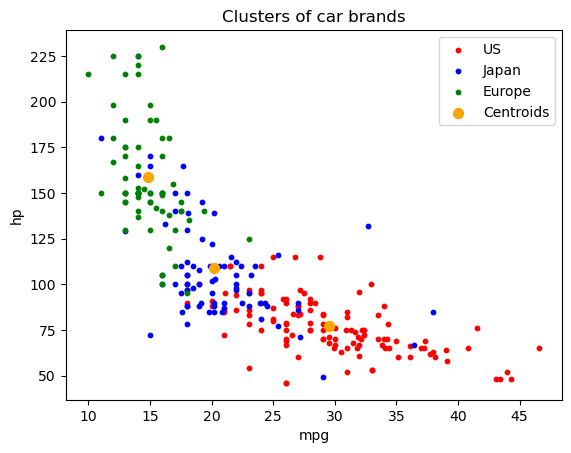

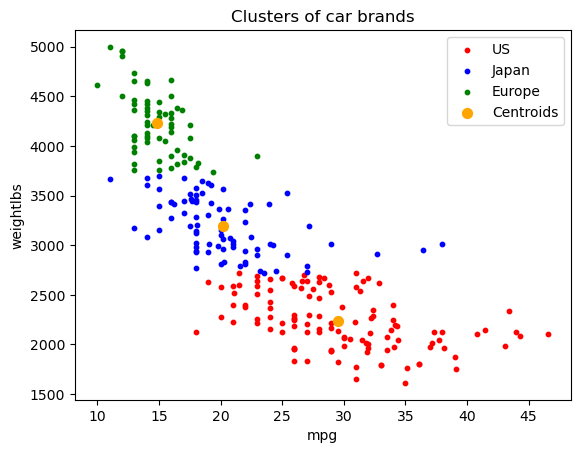

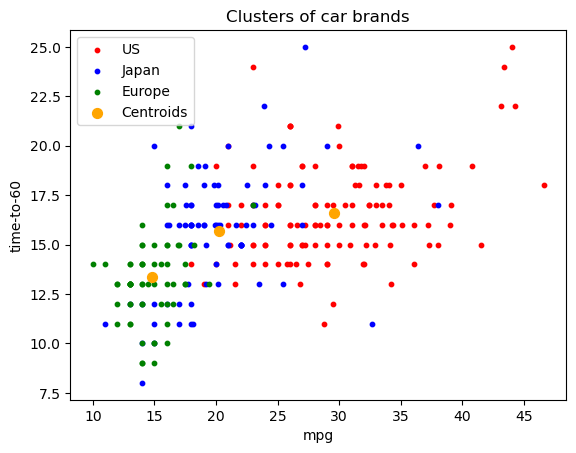

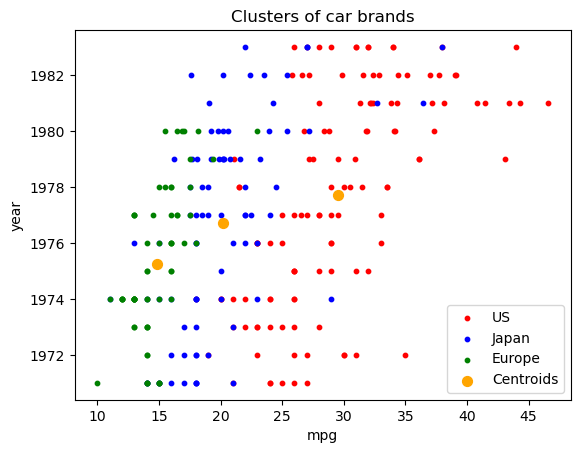

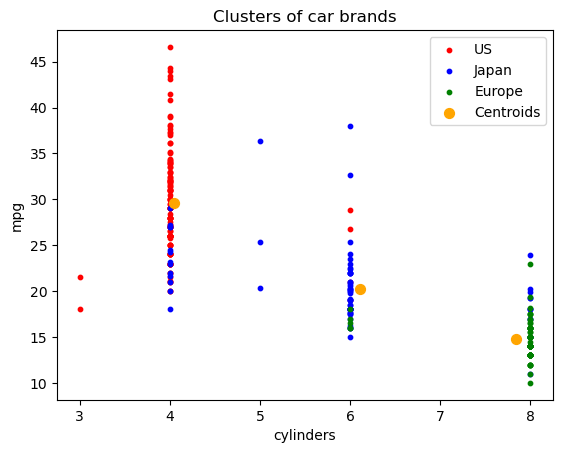

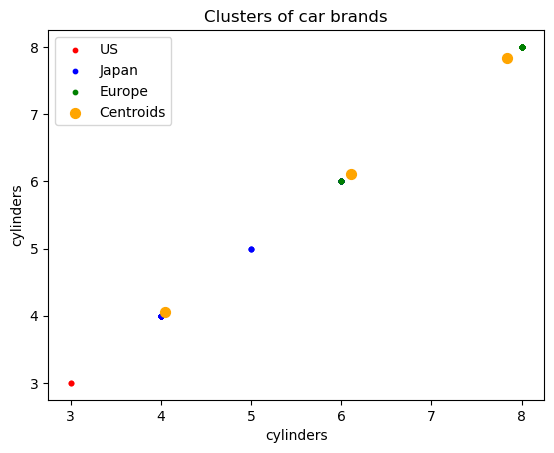

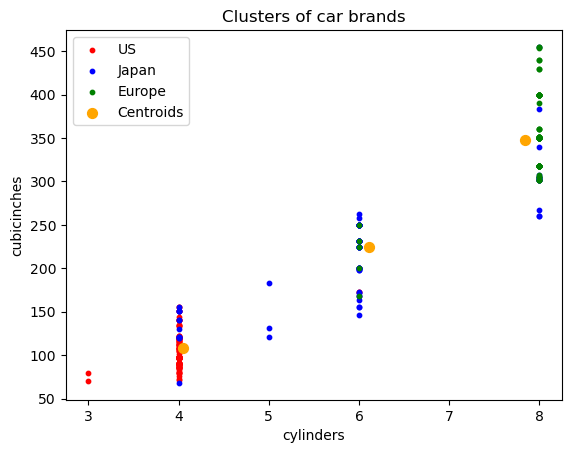

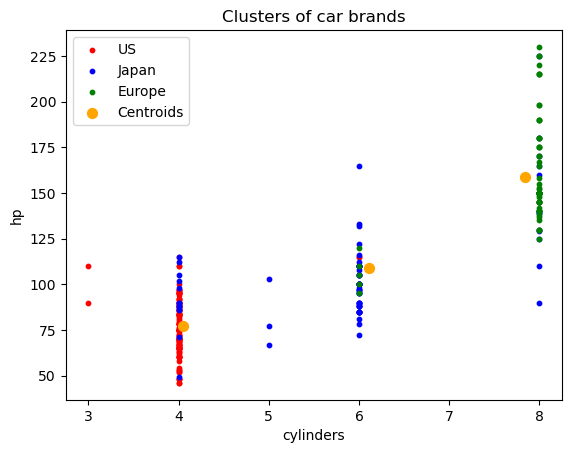

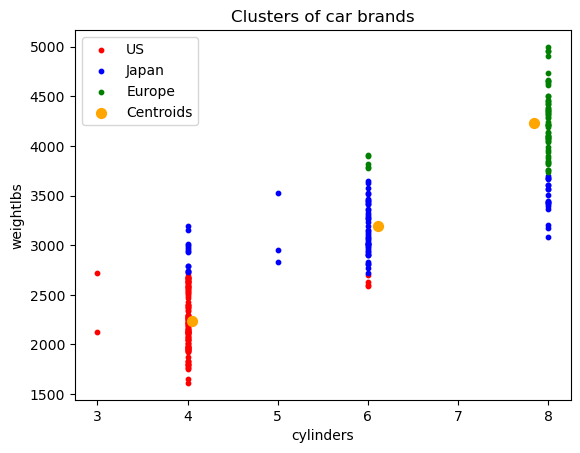

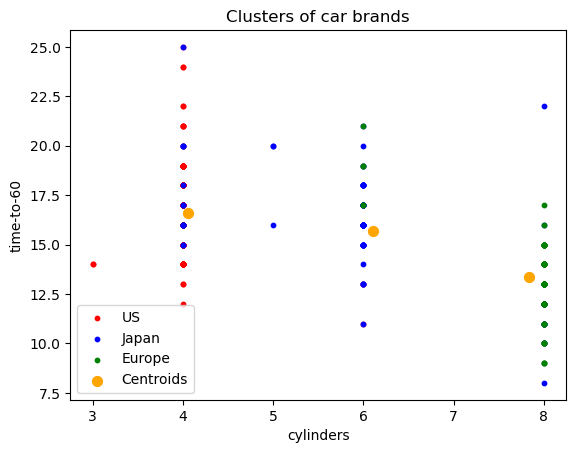

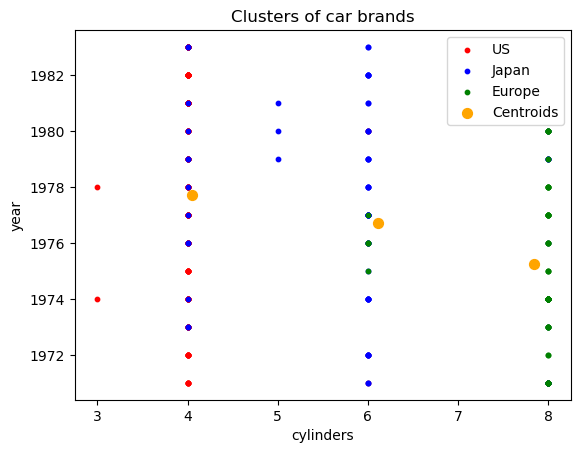

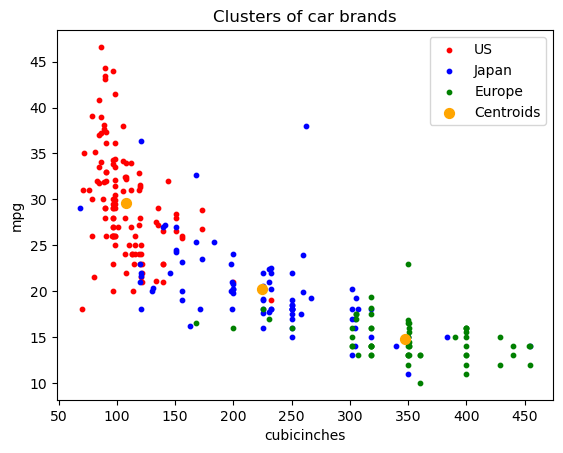

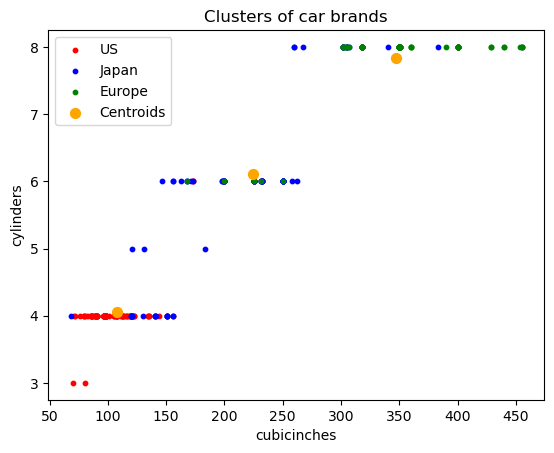

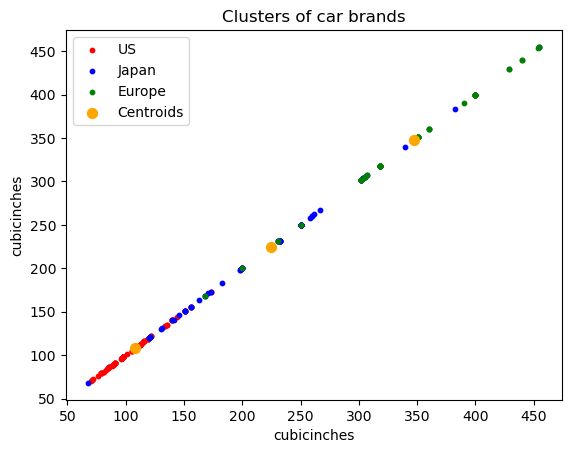

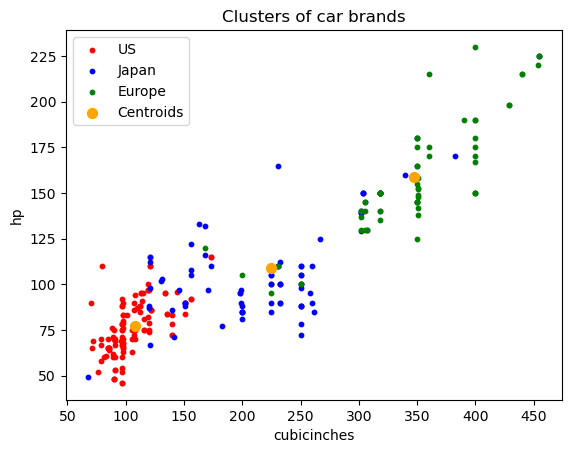

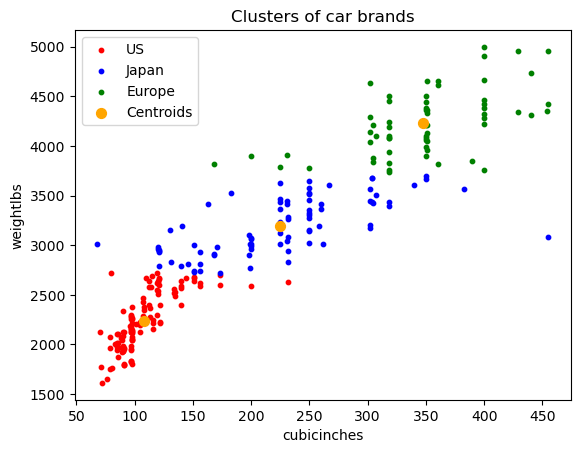

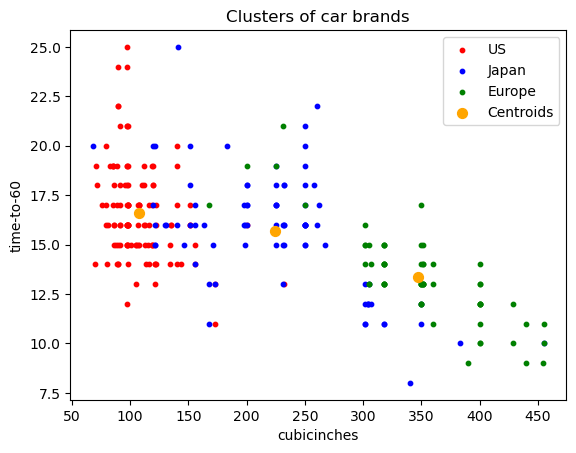

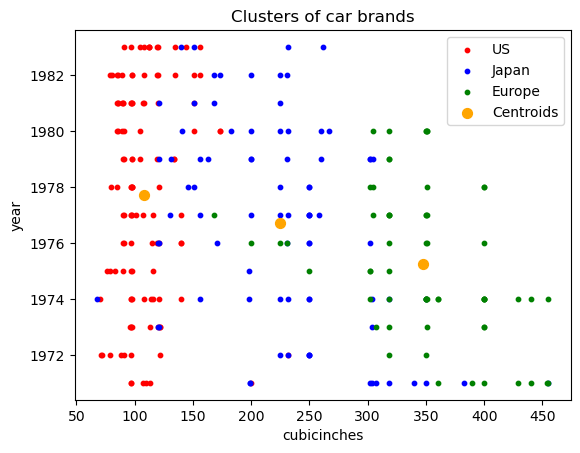

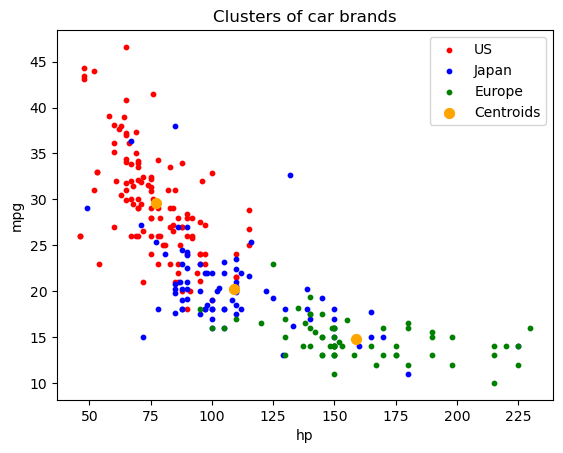

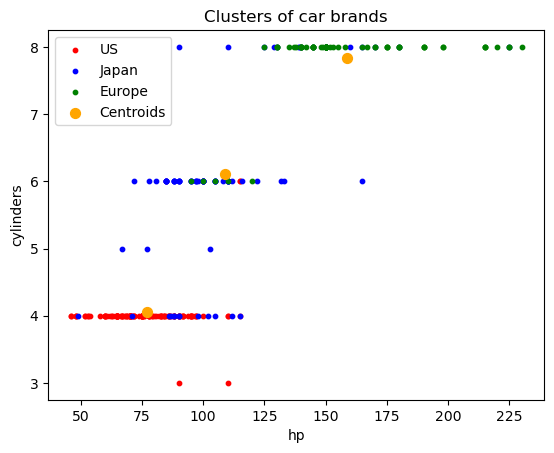

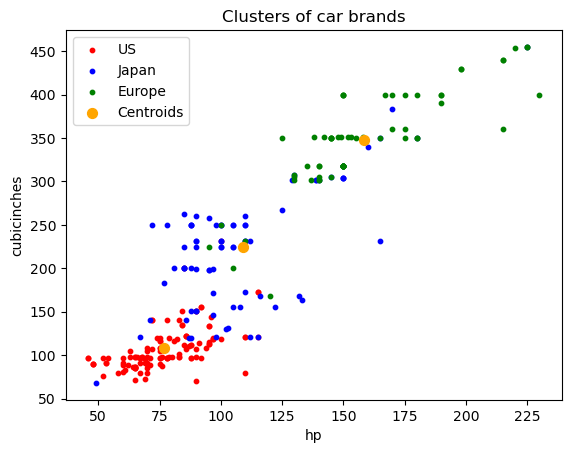

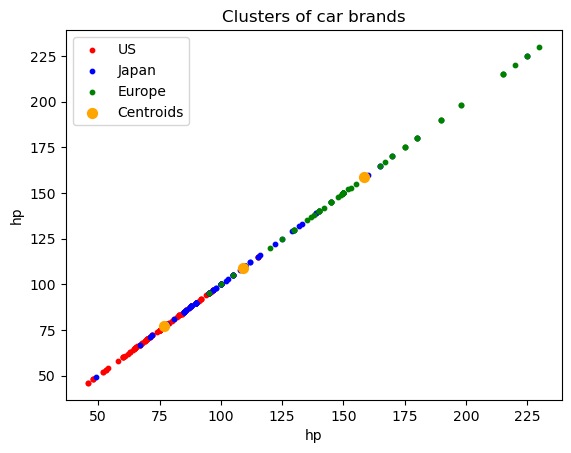

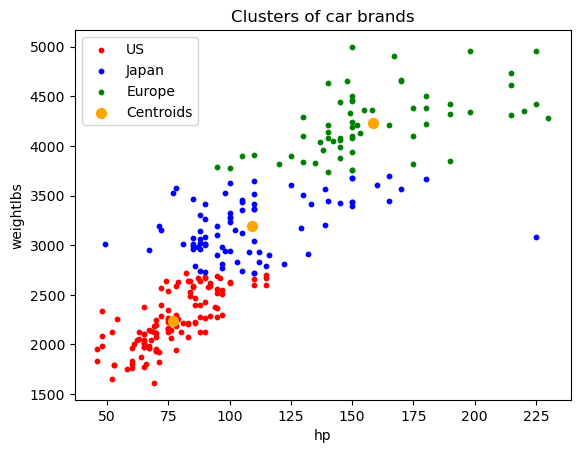

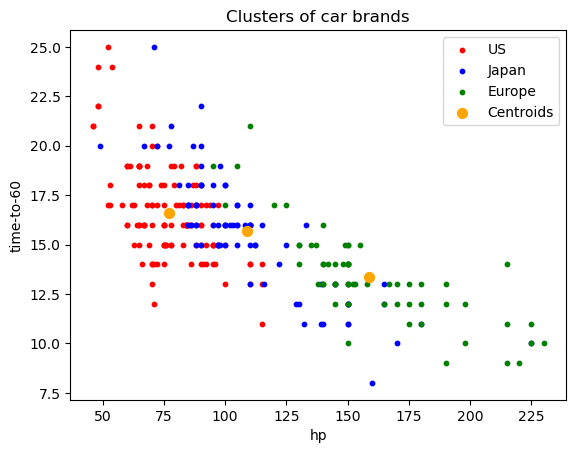

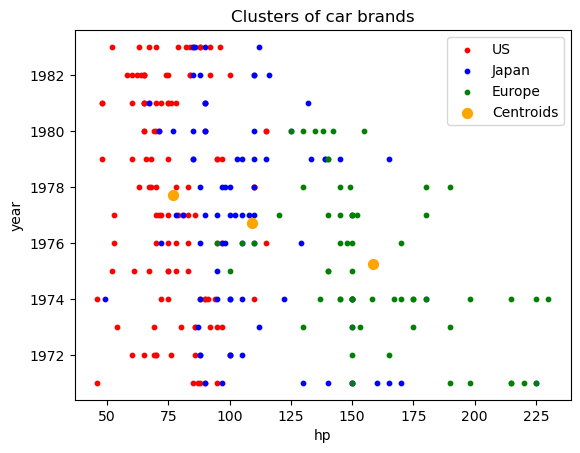

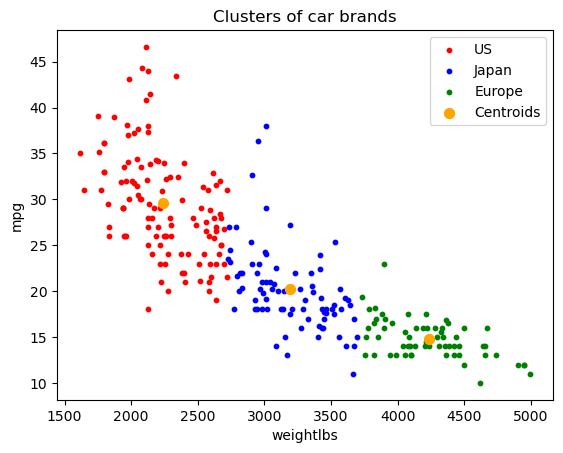

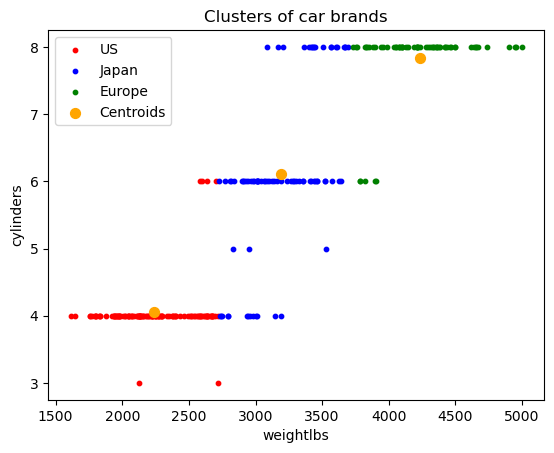

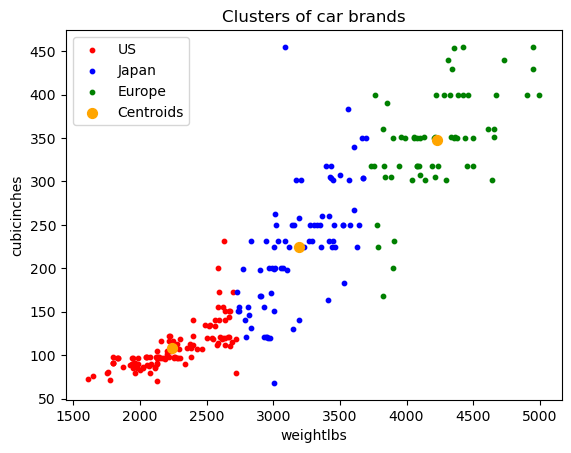

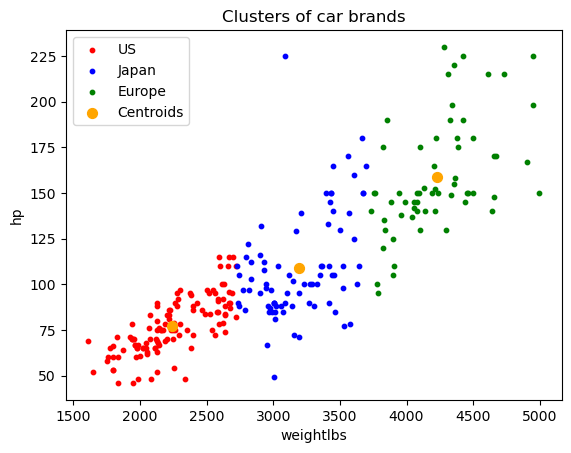

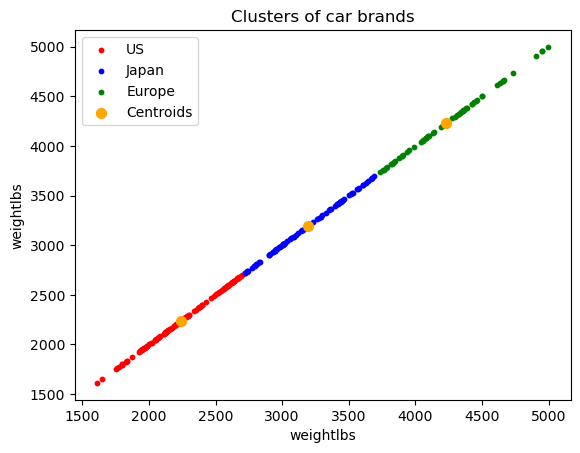

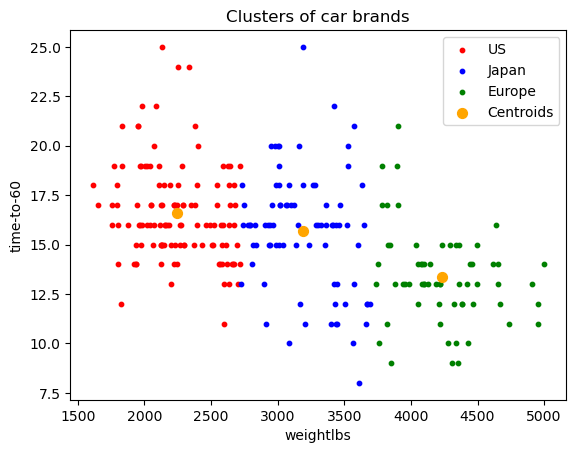

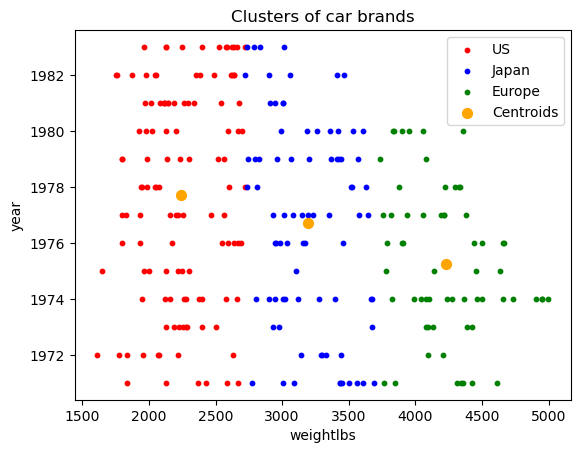

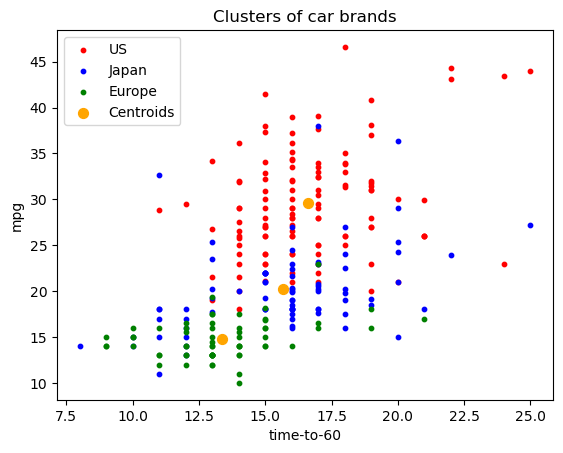

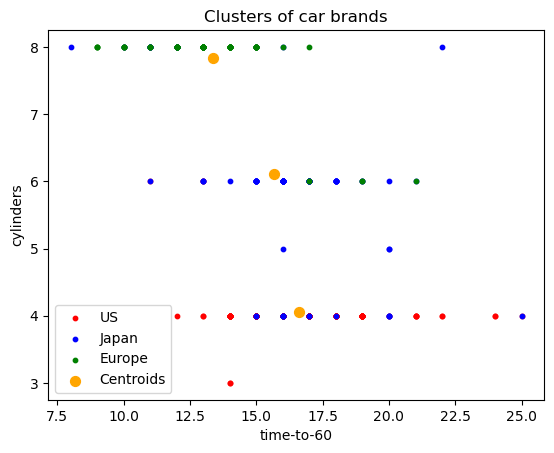

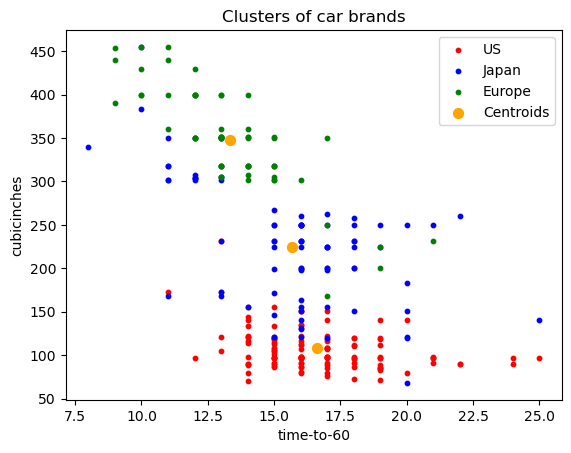

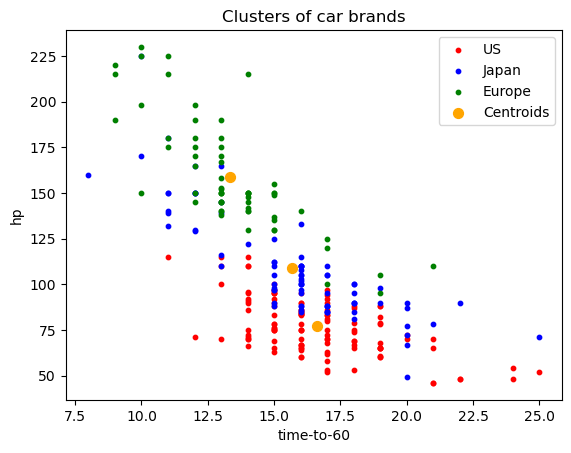

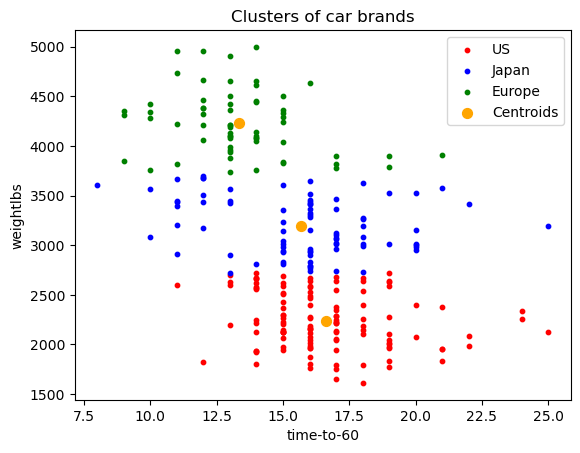

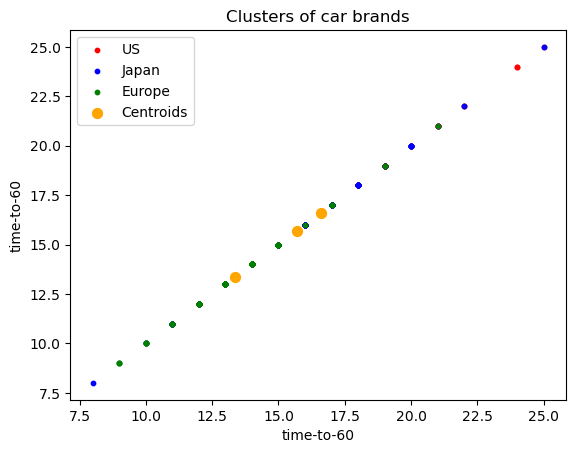

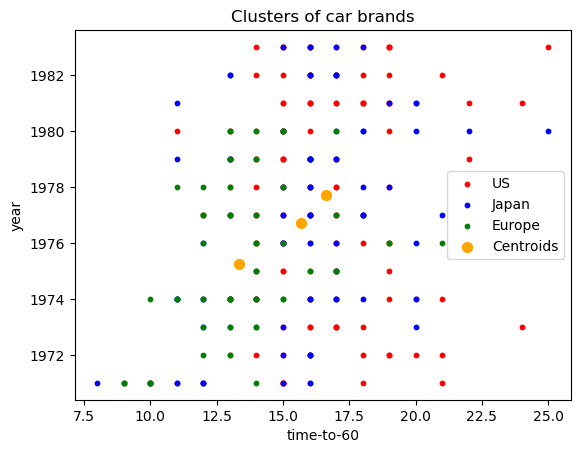

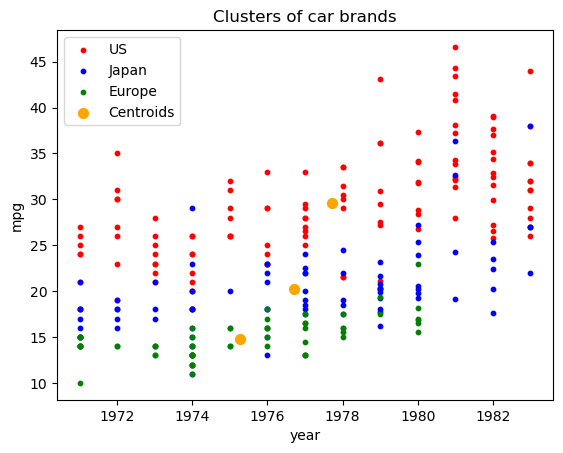

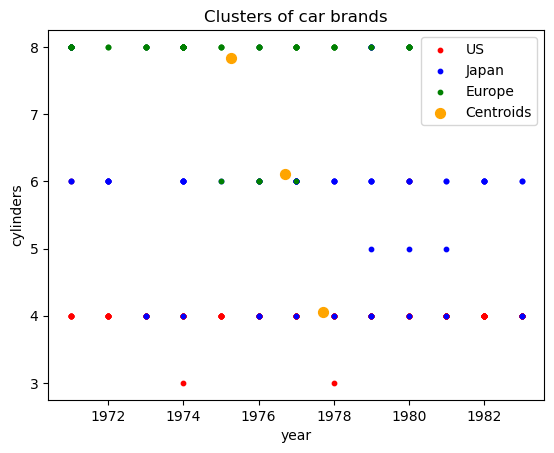

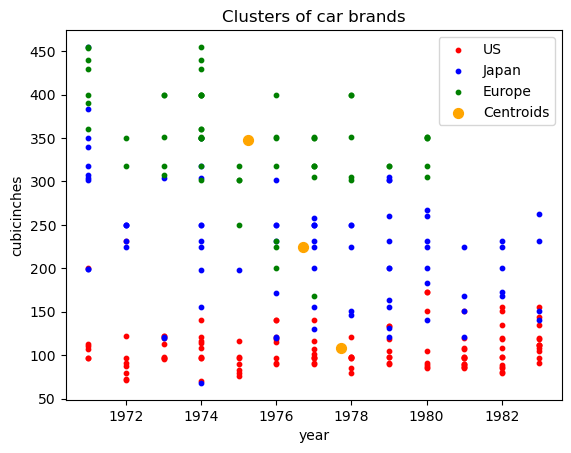

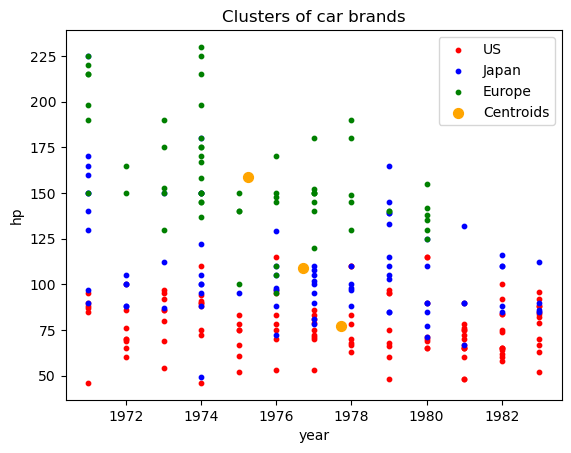

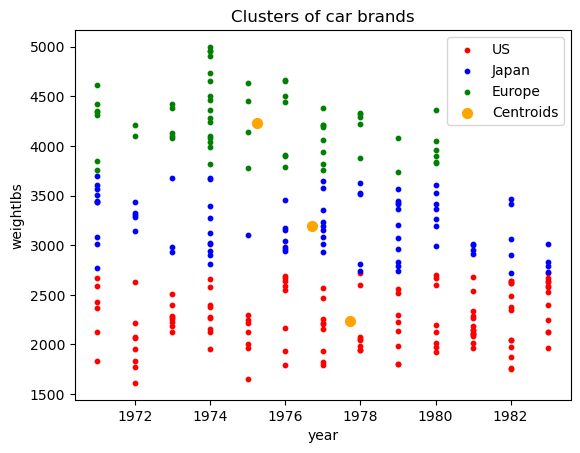

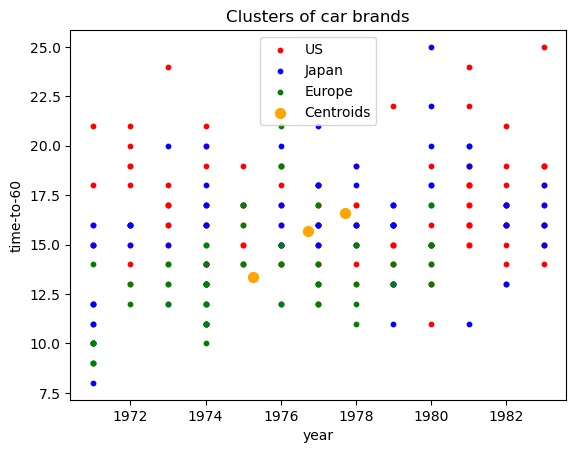

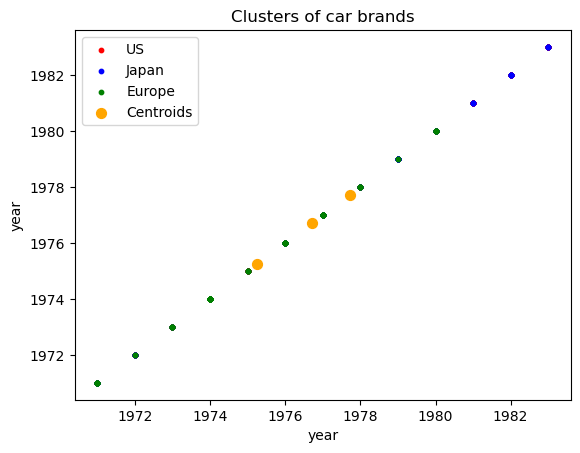

In [14]:
for i in range(0,7):
    for j in range(0,7):
        plt.scatter(X_numpy[y_kmeans == 0, i], X_numpy[y_kmeans == 0, j],s=10,c='red',label='US')
        plt.scatter(X_numpy[y_kmeans == 1, i], X_numpy[y_kmeans == 1, j],s=10,c='blue',label='Japan')
        plt.scatter(X_numpy[y_kmeans == 2, i], X_numpy[y_kmeans == 2, j],s=10,c='green',label='Europe')
        plt.scatter(kmeans.cluster_centers_[:,i],kmeans.cluster_centers_[:,j],s=50,c='orange',label='Centroids')
        plt.title('Clusters of car brands')
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.legend()
        plt.show()

## Evaluate Model

In [24]:
kmeanslabels = np.empty(kmeans.labels_.shape[0]).astype(str)
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 2:
        kmeanslabels[i] = ' Europe.'
    elif kmeans.labels_[i] == 1:
        kmeanslabels[i] = ' US.'
    elif kmeans.labels_[i] == 0:
        kmeanslabels[i] = ' Japan.'
    else:
        kmeanslabels[i] = NaN
kmeanslabels

array([' Europe.', ' Japan.', ' US.', ' Europe.', ' Japan.', ' Europe.',
       ' Europe.', ' Europe.', ' US.', ' Japan.', ' Japan.', ' Japan.',
       ' Europe.', ' US.', ' US.', ' Europe.', ' Japan.', ' US.',
       ' Japan.', ' Japan.', ' Japan.', ' Japan.', ' US.', ' Europe.',
       ' Japan.', ' Japan.', ' Japan.', ' Europe.', ' US.', ' Japan.',
       ' Japan.', ' US.', ' Japan.', ' US.', ' Japan.', ' US.', ' Japan.',
       ' Japan.', ' Europe.', ' US.', ' Europe.', ' Europe.', ' US.',
       ' US.', ' US.', ' Japan.', ' Europe.', ' Japan.', ' Japan.',
       ' US.', ' Europe.', ' US.', ' US.', ' Japan.', ' Europe.',
       ' Europe.', ' US.', ' Japan.', ' Japan.', ' Europe.', ' US.',
       ' Japan.', ' US.', ' Japan.', ' Europe.', ' US.', ' Japan.',
       ' Japan.', ' Japan.', ' Europe.', ' US.', ' Japan.', ' Japan.',
       ' Japan.', ' Japan.', ' US.', ' US.', ' Japan.', ' Japan.',
       ' Japan.', ' Europe.', ' Europe.', ' US.', ' Japan.', ' Japan.',
       ' Japan.', ' U

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['brand'],kmeanslabels))
print(classification_report(data['brand'],kmeanslabels))

[[ 1 35 12]
 [ 0 46  5]
 [61 37 64]]
              precision    recall  f1-score   support

     Europe.       0.02      0.02      0.02        48
      Japan.       0.39      0.90      0.54        51
         US.       0.79      0.40      0.53       162

    accuracy                           0.43       261
   macro avg       0.40      0.44      0.36       261
weighted avg       0.57      0.43      0.44       261



In [26]:
kmeans.labels_[2]

1